# EXPLORING REACTION KINETICS

# Preliminaries

In [1]:
if False:
    !pip uninstall numpy
    !pip install -q numpy==1.21.5
    !pip install -q tellurium==2.2.2.1

In [2]:
import numpy as np
import pandas as pd
import tellurium as te

# Using Antimony and Tellurium

## Antimony

Antimony is a language for describing biochemical pathways.
Consider a sequential pathway: $S_1 \xrightarrow{k_1 S_1} S_2 \xrightarrow{k_2 S_2} S_3$, with $S_1 =10$, $k_1 =1, k_2=1$.

In [3]:
MODEL1 = """
species S1, S2, S3

1 S1 -> S2; k1*S1
S2 -> S3; k2*S2

S1 = 10
S2 = 0
S3 = 0
k1 = 1
k2 = 1
"""

In [4]:
# Loading the simulation
rr = te.loada(MODEL1)

In [5]:
# Running the simulation
data = rr.simulate(0, 5, 100) # start time, end time, number of points

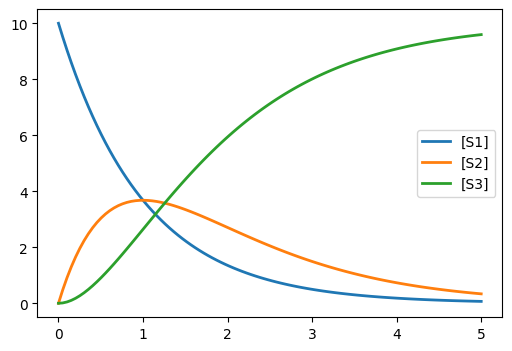

In [6]:
rr.plot(data)

In [7]:
print(rr.getAntimony())

// Created by libAntimony v2.13.2
// Compartments and Species:
species S1, S2, S3;

// Reactions:
_J0: S1 -> S2; k1*S1;
_J1: S2 -> S3; k2*S2;

// Species initializations:
S1 = 10;
S2 = 0;
S3 = 0;

// Variable initializations:
k1 = 1;
k2 = 1;

// Other declarations:
const k1, k2;



# Exploring kinetics in sequential pathway

## $S_1 \xrightarrow{k_1 S_1} S_2 \xrightarrow{k_2 S_2} S_3$, with $S_1 =10$, $k_1 =1, k_2=1$.

In [8]:
MODEL2 = """
species S1, S2, S3

S1 -> S2; k1*S1
S2 -> S3; k2*S2

S1 = 10
S2 = 0
S3 = 0
k1 = 2
k2 = 1
"""

In [9]:
# Function that adjust model parameters
def plotModel(model=MODEL2, parameter_dct=None, title="", is_plot=True):
    """
    Plots the simulation with the specified parameter values.
    
    Parameters
    ----------
    model: str
    parameter_dct: dict
        key: parameter name
        value: parameter value
    is_plot: bool
    
    Returns
    -------
    NamedArray
    """
    if parameter_dct is None:
        parameter_dct = {}
    rr = te.loada(model)
    for name, value in parameter_dct.items():
        rr[name] = value
    simulation_results = rr.simulate()
    if is_plot:
        rr.plot(simulation_results, title=title)
    return simulation_results
    
# TESTS
results = plotModel(is_plot=False)
assert("NamedArray" in str(type(results)))
print("OK")

OK


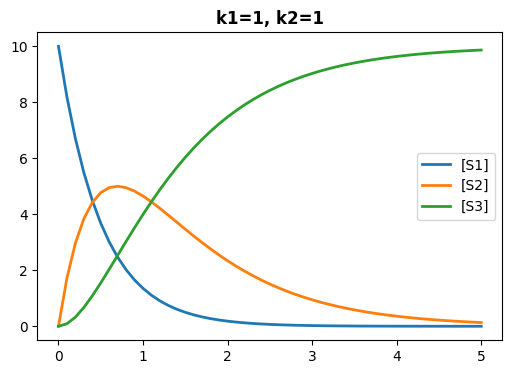

In [10]:
_ = plotModel(title="k1=1, k2=1")

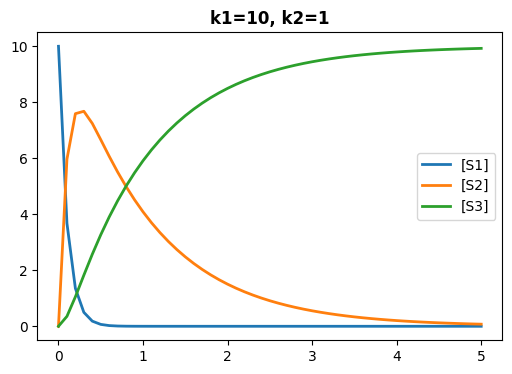

In [11]:
_ = plotModel(parameter_dct={"k1": 10}, title="k1=10, k2=1")

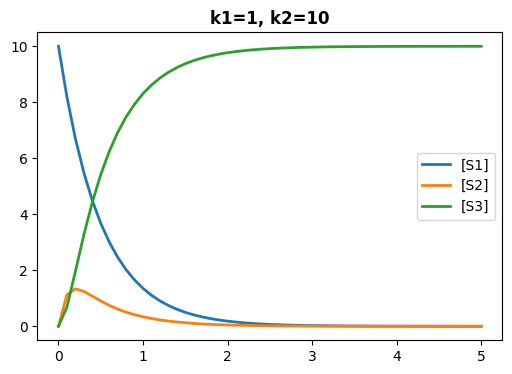

In [12]:
_ = plotModel(parameter_dct={"k2": 10}, title="k1=1, k2=10")

# Accessing models in BioModels

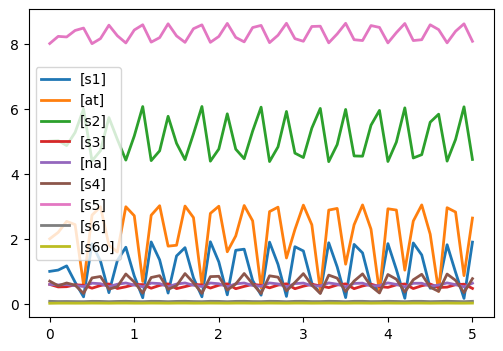

In [15]:
rr = te.loadSBMLModel("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000206.2?filename=BIOMD0000000206_url.xml")
rr.simulate()
rr.plot()

In [14]:
print(rr.getAntimony())

// Created by libAntimony v2.13.2
function Constant_flux__irreversible(v)
  v;
end

Constant_flux__irreversible is "Constant flux (irreversible)"

function function_for_v2(k2, S2, N1)
  k2*S2*N1;
end

function_for_v2 is "function for v2"

function function_for_d_dt_S4_ex(phi, J1, J2)
  (phi/2)*(J1 + J2);
end

function_for_d_dt_S4_ex is "function for d/dt(S4_ex)"

function function_for_v1(k1, S1, A3, K_I, q)
  k1*S1*A3*(1 + (A3/K_I)^q)^-1;
end

function_for_v1 is "function for v1"

function function_for_v3(k3, S3, A2)
  k3*S3*A2;
end

function_for_v3 is "function for v3"


model *Wolf2000___Cellular_interaction_on_glycolytic_oscillations_in_yeast()

  // Compartments and Species:
  compartment Cell_1, Cell_2, Compartment;
  species S1__Cell_1_ in Cell_1, S1__Cell_2_ in Cell_2, S2__Cell_1_ in Cell_1;
  species S2__Cell_2_ in Cell_2, S3__Cell_1_ in Cell_1, S3__Cell_2_ in Cell_2;
  species S4__Cell_1_ in Cell_1, S4__Cell_2_ in Cell_2, N2__Cell_1_ in Cell_1;
  species N2__Cell_2_ in Cell_2,